**In this notebook, I will be trying to predict gender of a given person using voice data**

In [5]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [6]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving voice.csv to voice.csv


In [7]:
data = pd.read_csv(io.BytesIO(uploaded['voice.csv']))

In [8]:
#check our data
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [9]:
data.info

<bound method DataFrame.info of       meanfreq        sd    median  ...   dfrange   modindx   label
0     0.059781  0.064241  0.032027  ...  0.000000  0.000000    male
1     0.066009  0.067310  0.040229  ...  0.046875  0.052632    male
2     0.077316  0.083829  0.036718  ...  0.007812  0.046512    male
3     0.151228  0.072111  0.158011  ...  0.554688  0.247119    male
4     0.135120  0.079146  0.124656  ...  5.476562  0.208274    male
...        ...       ...       ...  ...       ...       ...     ...
3163  0.131884  0.084734  0.153707  ...  4.203125  0.161929  female
3164  0.116221  0.089221  0.076758  ...  3.640625  0.277897  female
3165  0.142056  0.095798  0.183731  ...  2.929688  0.194759  female
3166  0.143659  0.090628  0.184976  ...  3.585938  0.311002  female
3167  0.165509  0.092884  0.183044  ...  0.546875  0.350000  female

[3168 rows x 21 columns]>

In [10]:
#encoding labels
label_encoder = LabelEncoder()

data['label'] = label_encoder.fit_transform(data['label'])

In [11]:
dict(enumerate(label_encoder.classes_))

{0: 'female', 1: 'male'}

In [13]:
data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


**Splitting and scaling the data now...**

In [33]:
y = data['label'].copy()
X = data.drop('label', axis=1).copy()

In [34]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

**Modeling and training**

In [36]:
X.shape

(3168, 20)

In [37]:
inputs = tf.keras.Input(shape=(X.shape[1],))

x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [38]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
56/56 [==============================] - 1s 9ms/step - loss: 0.5668 - accuracy: 0.7097 - auc: 0.7823 - val_loss: 0.1826 - val_accuracy: 0.9640 - val_auc: 0.9934
Epoch 2/100
56/56 [==============================] - 0s 5ms/step - loss: 0.1537 - accuracy: 0.9654 - auc: 0.9926 - val_loss: 0.0927 - val_accuracy: 0.9797 - val_auc: 0.9954
Epoch 3/100
56/56 [==============================] - 0s 4ms/step - loss: 0.1039 - accuracy: 0.9680 - auc: 0.9945 - val_loss: 0.0688 - val_accuracy: 0.9752 - val_auc: 0.9969
Epoch 4/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0767 - accuracy: 0.9750 - auc: 0.9961 - val_loss: 0.0587 - val_accuracy: 0.9820 - val_auc: 0.9976
Epoch 5/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0805 - accuracy: 0.9746 - auc: 0.9949 - val_loss: 0.0550 - val_accuracy: 0.9842 - val_auc: 0.9982
Epoch 6/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0607 - accuracy: 0.9828 - auc: 0.9975 - val_loss: 0.0550 - v

In [40]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 2ms/step - loss: 0.0622 - accuracy: 0.9769 - auc: 0.9979


[0.06218699738383293, 0.9768664836883545, 0.9978563189506531]

**Now using 2D CNNs**

In [41]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, dtype=np.float, maxlen=25, padding='post')
X = X.reshape(-1, 5, 5)
X = np.expand_dims(X, axis=3)

In [42]:
X.shape

(3168, 5, 5, 1)

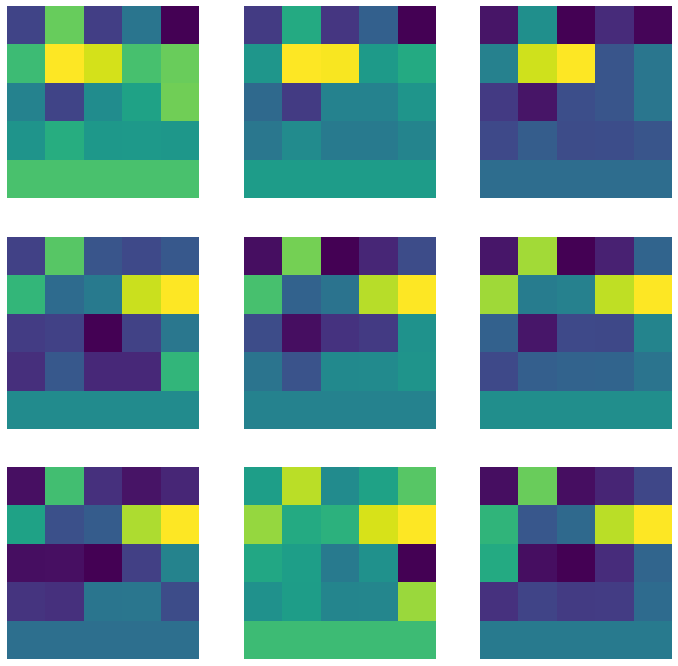

In [43]:
plt.figure(figsize=(12, 12))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(np.squeeze(X[i]))
    plt.axis('off')
    
plt.show()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [45]:
inputs = tf.keras.Input(shape=(X.shape[1], X.shape[2], X.shape[3]))

x = tf.keras.layers.Conv2D(16, 2, activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Conv2D(32, 1, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D()(x)

x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(64, activation='relu')(x)

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [46]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 5, 5, 1)]         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 4, 4, 16)          80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 16)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 2, 2, 32)          544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112

In [47]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)


Epoch 1/100
56/56 [==============================] - 6s 14ms/step - loss: 0.6623 - accuracy: 0.6381 - auc: 0.6985 - val_loss: 0.6009 - val_accuracy: 0.7658 - val_auc: 0.8199
Epoch 2/100
56/56 [==============================] - 0s 4ms/step - loss: 0.5478 - accuracy: 0.8263 - auc: 0.8852 - val_loss: 0.4121 - val_accuracy: 0.8694 - val_auc: 0.9479
Epoch 3/100
56/56 [==============================] - 0s 4ms/step - loss: 0.3846 - accuracy: 0.8762 - auc: 0.9386 - val_loss: 0.2781 - val_accuracy: 0.9099 - val_auc: 0.9689
Epoch 4/100
56/56 [==============================] - 0s 4ms/step - loss: 0.2584 - accuracy: 0.9154 - auc: 0.9683 - val_loss: 0.2308 - val_accuracy: 0.9167 - val_auc: 0.9742
Epoch 5/100
56/56 [==============================] - 0s 4ms/step - loss: 0.2307 - accuracy: 0.9153 - auc: 0.9713 - val_loss: 0.1977 - val_accuracy: 0.9324 - val_auc: 0.9796
Epoch 6/100
56/56 [==============================] - 0s 5ms/step - loss: 0.1903 - accuracy: 0.9292 - auc: 0.9788 - val_loss: 0.1902 - 

In [48]:
model.evaluate(X_test, y_test)

30/30 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 0.9569 - auc: 0.9931


[0.10568930953741074, 0.9568874835968018, 0.9930568337440491]

Reference: https://youtu.be/wqQ_bBOSoH0